# Simple Linear Regression

## Pre-Processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("Data.csv")

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:, -1].values

In [4]:
print (X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print (Y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [6]:
## Filling missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

print (X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [28]:
##encoding the independent values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

oht = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

X = np.array(oht.fit_transform(X))

print (X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [37]:
## encoding the dependent data

from sklearn.preprocessing import LabelEncoder

llb = LabelEncoder()
Y = llb.fit_transform(Y)

print (Y)

[0 1 0 0 1 1 0 1 0 1]


In [44]:
## split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
print (X_train)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [46]:
print (Y_train)

[1 1 1 0 1 0 0 1]


In [47]:
print (X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


In [48]:
print (Y_test)

[0 0]


In [70]:
## feature scaling

from sklearn.preprocessing import StandardScaler

scc = StandardScaler()

X_train[:,3:] = scc.fit_transform(X_train[:,3:])
X_test[:,3:] = scc.transform(X_test[:,3:])

print (X_train)
print (X_test)

print (Y_train)
print (Y_test)

[[0.0 1.0 0.0 0.26306757317135365 0.12381478548381811]
 [1.0 0.0 0.0 -0.2535014796014863 0.46175631762788527]
 [0.0 0.0 1.0 -1.9753983221776197 -1.5309334063940299]
 [0.0 0.0 1.0 0.052613514634270886 -1.111419780284153]
 [1.0 0.0 0.0 1.6405850472322603 1.7202971959575157]
 [0.0 0.0 1.0 -0.08131179534387295 -0.16751412153693004]
 [1.0 0.0 0.0 0.9518263102018071 0.9861483502652313]
 [1.0 0.0 0.0 -0.5978808481167129 -0.4821493411193376]]
[[0.0 1.0 0.0 -1.4588292694047797 -0.9016629672292145]
 [0.0 1.0 0.0 1.9849644157474868 2.1398108220673926]]
[1 1 1 0 1 0 0 1]
[0 0]


## Simple linear regression on the data

In [59]:
## import libraries

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [61]:
Y_test_pred = lr.predict(X_test)

In [72]:
print (Y_test_pred)

[1.57325397 0.72686416]


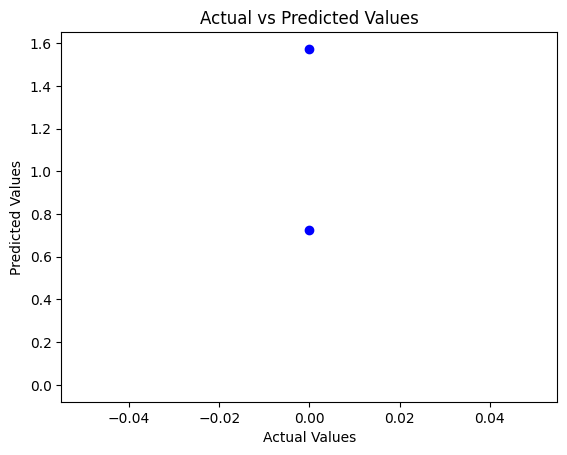

In [77]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot(Y_test, Y_test, color='red', linestyle='--')  # Diagonal line representing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
